In [25]:
#fuel_emissions1csv.csv

In [26]:
import pandas as pd
import os

#Retrieve relative path to access csv file
working_directory = os.path.abspath('')
csv_path = os.path.join(working_directory, 'fuel_emissions1csv.csv')
data = pd.read_csv(csv_path, low_memory=False)
csv_path = os.path.join(working_directory, 'original.csv')
original = pd.read_csv(csv_path, low_memory=False)

print(data.head())

  State_id State  Reporting Year  industry_id Industry Type (sectors)  \
0        1    AK            2021           10                   Other   
1        1    AK            2021           10                   Other   
2        1    AK            2020           10                   Other   
3        1    AK            2020           10                   Other   
4        1    AK            2020           10                   Other   

   fuel_id   General Fuel Type  Fuel Methane (CH4) emissions (mt CO2e)  \
0        5  Petroleum Products                                   46.25   
1        6  Petroleum Products                                    0.25   
2        5               Other                                    6.25   
3        5  Petroleum Products                                   50.25   
4        6  Petroleum Products                                    0.25   

   Fuel Nitrous Oxide (N2O) emissions (mt CO2e)  
0                                       109.962  
1               

In [27]:
#Number of Data Points
print(len(data))

189982


In [28]:
#Top 15 methane emmisions

df2= data.sort_values(by='Fuel Methane (CH4) emissions (mt CO2e)', ascending= False)
print(df2.head(15))

       State_id State  Reporting Year  industry_id Industry Type (sectors)  \
53436        16    IN            2012            5            Power Plants   
53429        16    IN            2014            5            Power Plants   
53439        16    IN            2011            5            Power Plants   
53433        16    IN            2013            5            Power Plants   
53425        16    IN            2015            5            Power Plants   
53413        16    IN            2018            5            Power Plants   
53421        16    IN            2016            5            Power Plants   
47279        15    IL            2011            5            Power Plants   
53417        16    IN            2017            5            Power Plants   
47273        15    IL            2014            5            Power Plants   
47275        15    IL            2013            5            Power Plants   
47277        15    IL            2012            5            Po

In [29]:
#Top 15 Nitrous Oxide emmisions
df2= data.sort_values(by='Fuel Nitrous Oxide (N2O) emissions (mt CO2e)', ascending= False)
print(df2.head(15))

       State_id State  Reporting Year  industry_id Industry Type (sectors)  \
52820        16    IN            2012           10                   Other   
53436        16    IN            2012            5            Power Plants   
53429        16    IN            2014            5            Power Plants   
53439        16    IN            2011            5            Power Plants   
53433        16    IN            2013            5            Power Plants   
53425        16    IN            2015            5            Power Plants   
53413        16    IN            2018            5            Power Plants   
53421        16    IN            2016            5            Power Plants   
47279        15    IL            2011            5            Power Plants   
53417        16    IN            2017            5            Power Plants   
47273        15    IL            2014            5            Power Plants   
47275        15    IL            2013            5            Po

In [30]:
yearly_mean_methane = data.groupby("Reporting Year")["Fuel Methane (CH4) emissions (mt CO2e)"].mean()
print(yearly_mean_methane)


yearly_mean_n2o = data.groupby("Reporting Year")["Fuel Nitrous Oxide (N2O) emissions (mt CO2e)"].mean()
print(yearly_mean_n2o)

industry_mode = data["Industry Type (sectors)"].mode()
fuel_mode = data["General Fuel Type"].mode()
state_mode = data["State"].mode()

print(industry_mode) #power plants
print(fuel_mode) #natural gas
print(state_mode) #Texas 

Reporting Year
2010    1700.109580
2011     326.766201
2012     291.573953
2013     259.659739
2014     267.684335
2015     249.013178
2016     244.986202
2017     247.402926
2018     235.034676
2019     219.133312
2020     193.514623
2021     206.805787
Name: Fuel Methane (CH4) emissions (mt CO2e), dtype: float64
Reporting Year
2010    3413.933365
2011     682.926725
2012     613.832837
2013     583.103630
2014     565.689409
2015     515.604507
2016     520.767334
2017     515.339819
2018     486.671626
2019     447.696414
2020     395.389486
2021     427.947613
Name: Fuel Nitrous Oxide (N2O) emissions (mt CO2e), dtype: float64
0    Power Plants
Name: Industry Type (sectors), dtype: object
0    Natural Gas
Name: General Fuel Type, dtype: object
0    TX
Name: State, dtype: object


In [31]:
df_reportYr = pd.DataFrame(data["Reporting Year"]) #make year its own dataframe so the year will not be normalized

df_State = pd.DataFrame(data["State"])
df_industry = pd.DataFrame(data["Industry Type (sectors)"])

dfClean_maxScaled = data.copy() 
dfClean_maxScaled.drop(["State", "General Fuel Type", "Industry Type (sectors)", "Reporting Year"], 
                       axis=1, inplace=True) #drop year and non numeric columns

dfClean_maxScaled = dfClean_maxScaled.apply(pd.to_numeric, errors='coerce') #convert the remaining columns to numeric, 
                                                                            #and et errors='coerce' to handle non-numeric values by converting them to NaN.

for column in dfClean_maxScaled.columns:
    dfClean_maxScaled[column] = dfClean_maxScaled[column]  / dfClean_maxScaled[column].abs().max() #normalize data

dfClean_maxScaled = pd.concat([df_reportYr, dfClean_maxScaled], axis=1) #add reporting year back in 
#dfClean_maxScaled = pd.concat([df_State, dfClean_maxScaled], axis=2) 
#dfClean_maxScaled = pd.concat([df_industry, dfClean_maxScaled], axis=4)
      
# view normalized data
display(dfClean_maxScaled)

dfClean_minMax = data.copy()

dfClean_minMax.drop(["State", "General Fuel Type", "Industry Type (sectors)", "Reporting Year"], axis=1, inplace=True)
dfClean_minMax = dfClean_minMax.apply(pd.to_numeric, errors='coerce')

for column in dfClean_minMax.columns:
    dfClean_minMax[column] = (dfClean_minMax[column] - dfClean_minMax[column].min()) / (dfClean_minMax[column].max() - dfClean_minMax[column].min())   
    

dfClean_minMax = pd.concat([df_reportYr, dfClean_minMax], axis=1) #add reporting year back in 
#dfClean_minMax = pd.concat([df_State, dfClean_minMax], axis=2)  
#dfClean_minMax = pd.concat([df_industry, dfClean_minMax], axis=4)
  
# view normalized data
print(dfClean_minMax)


,Reporting Year,State_id,industry_id,fuel_id,Fuel Methane (CH4) emissions (mt CO2e),Fuel Nitrous Oxide (N2O) emissions (mt CO2e)
0,2021,0.018868,1.0,0.833333,0.000902,0.000780
1,2021,0.018868,1.0,1.000000,0.000005,0.000006
2,2020,0.018868,1.0,0.833333,0.000122,0.000070
3,2020,0.018868,1.0,0.833333,0.000980,0.000851
4,2020,0.018868,1.0,1.000000,0.000005,0.000006
...,...,...,...,...,...,...
189977,2013,0.962264,0.4,0.333333,0.000161,0.000070
189978,2013,0.962264,0.4,0.666667,0.000127,0.000080
189979,2012,0.962264,0.4,0.333333,0.000190,0.000082
189980,2012,0.962264,0.4,0.666667,0.000122,0.000078


        Reporting Year  State_id  industry_id  fuel_id  \
0                 2021  0.000000     1.000000      0.8   
1                 2021  0.000000     1.000000      1.0   
2                 2020  0.000000     1.000000      0.8   
3                 2020  0.000000     1.000000      0.8   
4                 2020  0.000000     1.000000      1.0   
...                ...       ...          ...      ...   
189977            2013  0.961538     0.333333      0.2   
189978            2013  0.961538     0.333333      0.6   
189979            2012  0.961538     0.333333      0.2   
189980            2012  0.961538     0.333333      0.6   
189981            2011  0.961538     0.333333      0.2   

        Fuel Methane (CH4) emissions (mt CO2e)  \
0                                     0.000902   
1                                     0.000005   
2                                     0.000122   
3                                     0.000980   
4                                     0.000005   
...

In [32]:
#Top 15 Nitrous Oxide emmisions
df4= dfClean_minMax.sort_values(by='Fuel Nitrous Oxide (N2O) emissions (mt CO2e)', ascending= False)
df4 = df4[['Reporting Year', 'State_id', 'industry_id', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']]
print(df4.head(15))

        Reporting Year  State_id  industry_id  \
52820             2012  0.288462     1.000000   
53436             2012  0.288462     0.444444   
53429             2014  0.288462     0.444444   
53439             2011  0.288462     0.444444   
53433             2013  0.288462     0.444444   
53425             2015  0.288462     0.444444   
53413             2018  0.288462     0.444444   
53421             2016  0.288462     0.444444   
47279             2011  0.269231     0.444444   
53417             2017  0.288462     0.444444   
47273             2014  0.269231     0.444444   
47275             2013  0.269231     0.444444   
89988             2011  0.442308     0.444444   
89966             2017  0.442308     0.444444   
118157            2014  0.673077     0.444444   

        Fuel Nitrous Oxide (N2O) emissions (mt CO2e)  
52820                                       1.000000  
53436                                       0.630636  
53429                                       0.5621

In [33]:
#Top 15 methane emmisions
df5= dfClean_minMax.sort_values(by='Fuel Methane (CH4) emissions (mt CO2e)', ascending= False)
df5 = df5[['Reporting Year', 'State_id', 'industry_id', 'Fuel Methane (CH4) emissions (mt CO2e)']]
print(df5.head(15))

        Reporting Year  State_id  industry_id  \
53436             2012  0.288462     0.444444   
53429             2014  0.288462     0.444444   
53439             2011  0.288462     0.444444   
53433             2013  0.288462     0.444444   
53425             2015  0.288462     0.444444   
53413             2018  0.288462     0.444444   
53421             2016  0.288462     0.444444   
47279             2011  0.269231     0.444444   
53417             2017  0.288462     0.444444   
47273             2014  0.269231     0.444444   
47275             2013  0.269231     0.444444   
47277             2012  0.269231     0.444444   
118157            2014  0.673077     0.444444   
118173            2011  0.673077     0.444444   
118174            2011  0.673077     0.444444   

        Fuel Methane (CH4) emissions (mt CO2e)  
53436                                 1.000000  
53429                                 0.882384  
53439                                 0.867822  
53433              

In [34]:
#top 15 states for NO2 emissions
df6=dfClean_minMax.groupby('State_id')['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'].sum().reset_index()
df6.columns = ['State', 'Total NO2 Emissions']
df6 = df6.sort_values(by='Total NO2 Emissions', ascending=False)
print(df6.head(15))

       State  Total NO2 Emissions
43  0.826923            75.506330
15  0.288462            34.248450
14  0.269231            30.906168
9   0.173077            30.785294
35  0.673077            30.661729
17  0.326923            30.638583
38  0.730769            29.967520
1   0.019231            26.896669
49  0.942308            25.533809
24  0.461538            25.144187
10  0.192308            25.131014
18  0.346154            22.953812
22  0.423077            22.946430
27  0.519231            20.259207
50  0.961538            18.210637


In [35]:
#top 15 states for Methane emissions
df7=dfClean_minMax.groupby('State_id')['Fuel Methane (CH4) emissions (mt CO2e)'].sum().reset_index()
df7.columns = ['State', 'Total methane Emissions']
df7 = df7.sort_values(by='Total methane Emissions', ascending=False)
print(df7.head(15))

       State  Total methane Emissions
43  0.826923                93.751048
15  0.288462                49.380308
9   0.173077                49.084284
14  0.269231                47.645764
17  0.326923                40.349233
35  0.673077                39.942856
38  0.730769                37.948923
1   0.019231                37.209008
10  0.192308                35.508531
27  0.519231                29.996190
18  0.346154                28.255855
49  0.942308                26.451634
50  0.961538                26.180120
22  0.423077                26.113091
24  0.461538                23.881152


In [36]:
#top 15 industries for NO2 emissions
df11=dfClean_minMax.groupby('industry_id')['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'].sum().reset_index()
df11.columns = ['Industry', 'Total NO2 Emissions']
df11 = df11.sort_values(by='Total NO2 Emissions', ascending=False)
print(df11.head(15))

   Industry  Total NO2 Emissions
4  0.444444           548.318803
6  0.666667            67.877945
5  0.555556            30.970793
0  0.000000            28.787664
9  1.000000            17.829001
8  0.888889            12.326340
3  0.333333             5.883724
7  0.777778             4.440327
2  0.222222             1.856103
1  0.111111             0.005675


In [37]:
#top 15 industries for Methane emissions
df12=dfClean_minMax.groupby('industry_id')['Fuel Methane (CH4) emissions (mt CO2e)'].sum().reset_index()
df12.columns = ['Industry', 'Total Methane Emissions']
df12 = df12.sort_values(by='Total Methane Emissions', ascending=False)
print(df12.head(15))

   Industry  Total Methane Emissions
4  0.444444               711.767875
6  0.666667                76.737751
5  0.555556                52.125648
0  0.000000                36.848252
9  1.000000                26.327477
8  0.888889                14.605419
3  0.333333                 9.592537
7  0.777778                 9.484089
2  0.222222                 3.191056
1  0.111111                 0.012948


    Year  Total methane Emissions
0   2010                12.626482
1   2011               115.711528
2   2012               107.250858
3   2013                91.432089
4   2014                96.365801
5   2015                88.013264
6   2016                80.023579
7   2017                79.245633
8   2018                77.515167
9   2019                69.319182
10  2020                59.080065
11  2021                64.109404


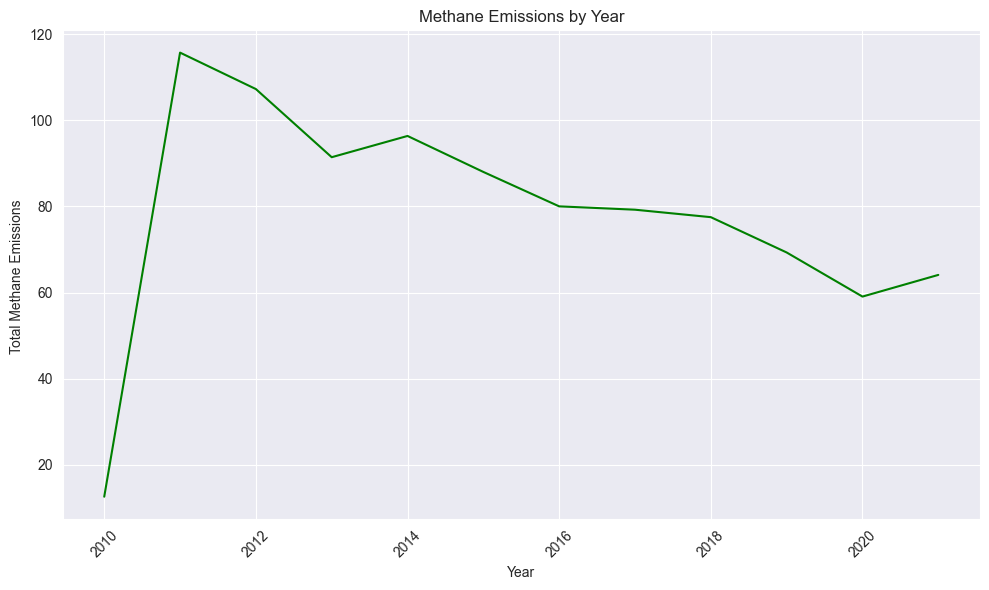

In [38]:
#Methane emissions by year
df8=dfClean_minMax.groupby('Reporting Year')['Fuel Methane (CH4) emissions (mt CO2e)'].sum().reset_index()
df8.columns = ['Year', 'Total methane Emissions']
#Uncomment to see in decending order
#df8 = df8.sort_values(by='Total methane Emissions', ascending=False)
print(df8.head(15))

import matplotlib.pyplot as plt

#visualization
plt.figure(figsize=(10, 6))
plt.plot(df8['Year'], df8['Total methane Emissions'], color='green')
plt.xlabel('Year')
plt.ylabel('Total Methane Emissions ')
plt.title('Methane Emissions by Year')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

    Year  Total no2 Emissions
0   2010             9.222044
1   2011            87.958998
2   2012            82.123761
3   2013            74.680370
4   2014            74.070400
5   2015            66.284067
6   2016            61.870944
7   2017            60.038642
8   2018            58.379103
9   2019            51.510441
10  2020            43.905499
11  2021            48.252108


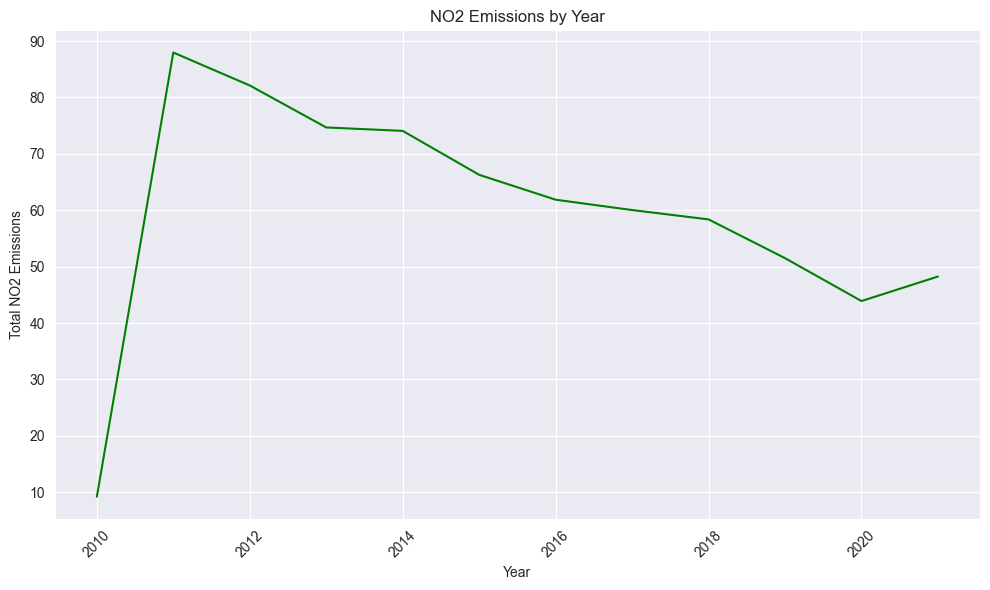

In [39]:
#NO2 emissions by year
df9=dfClean_minMax.groupby('Reporting Year')['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'].sum().reset_index()
df9.columns = ['Year', 'Total no2 Emissions']
#Un-comment this to see the emmisions in decending order
#df9 = df9.sort_values(by='Total no2 Emissions', ascending=False)
print(df9.head(15))


#Visualization
plt.figure(figsize=(10, 6))
plt.plot(df9['Year'], df9['Total no2 Emissions'], color='green')
plt.xlabel('Year')
plt.ylabel('Total NO2 Emissions')
plt.title('NO2 Emissions by Year')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


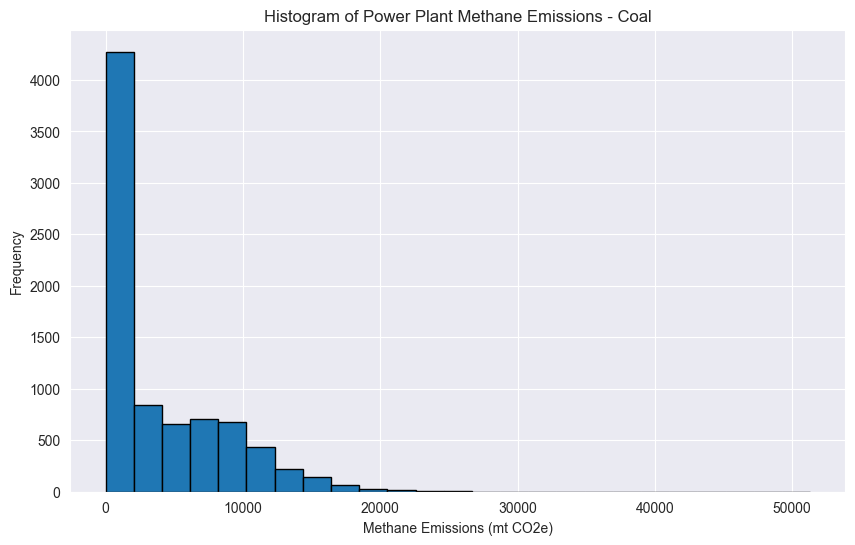

In [40]:
plt.figure(figsize=(10, 6))
df13 = data[(data['Industry Type (sectors)'] == 'Power Plants') & (data['General Fuel Type'] == 'Coal')]
plt.hist(df13['Fuel Methane (CH4) emissions (mt CO2e)'], bins=25, edgecolor='k')
plt.title('Histogram of Power Plant Methane Emissions - Coal')
plt.xlabel('Methane Emissions (mt CO2e)')
plt.ylabel('Frequency')
plt.show()


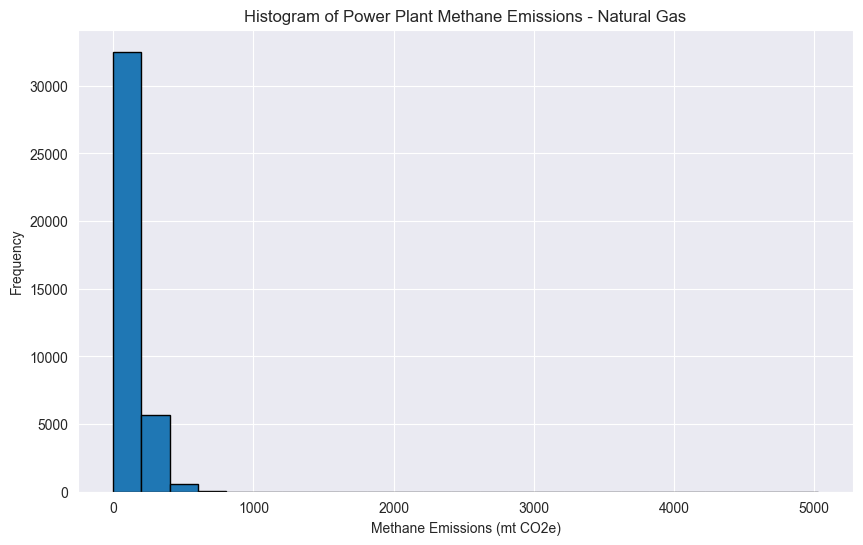

In [41]:
plt.figure(figsize=(10, 6))
df13 = data[(data['Industry Type (sectors)'] == 'Power Plants') & (data['General Fuel Type'] == 'Natural Gas')]
plt.hist(df13['Fuel Methane (CH4) emissions (mt CO2e)'], bins=25, edgecolor='k')
plt.title('Histogram of Power Plant Methane Emissions - Natural Gas')
plt.xlabel('Methane Emissions (mt CO2e)')
plt.ylabel('Frequency')
plt.show()

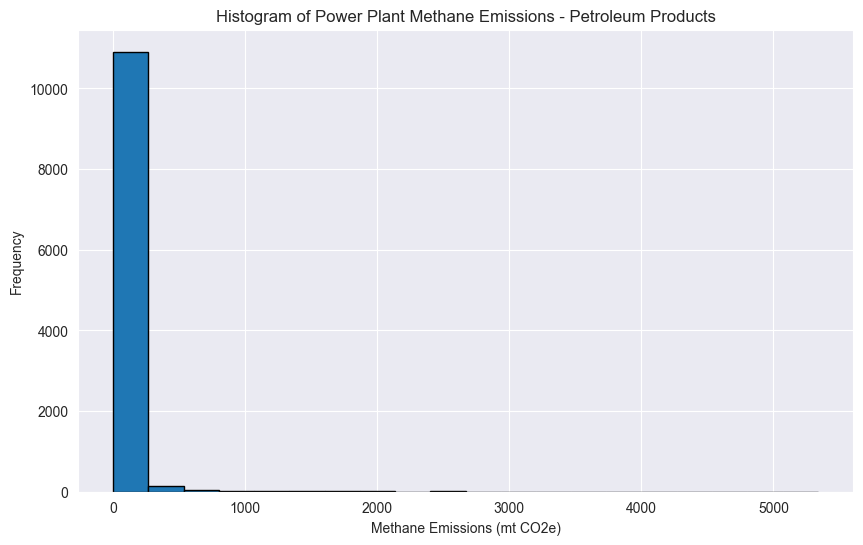

In [42]:
plt.figure(figsize=(10, 6))
df13 = data[(data['Industry Type (sectors)'] == 'Power Plants') & (data['General Fuel Type'] == 'Petroleum Products')]
plt.hist(df13['Fuel Methane (CH4) emissions (mt CO2e)'], bins=20, edgecolor='k')
plt.title('Histogram of Power Plant Methane Emissions - Petroleum Products')
plt.xlabel('Methane Emissions (mt CO2e)')
plt.ylabel('Frequency')
plt.show()

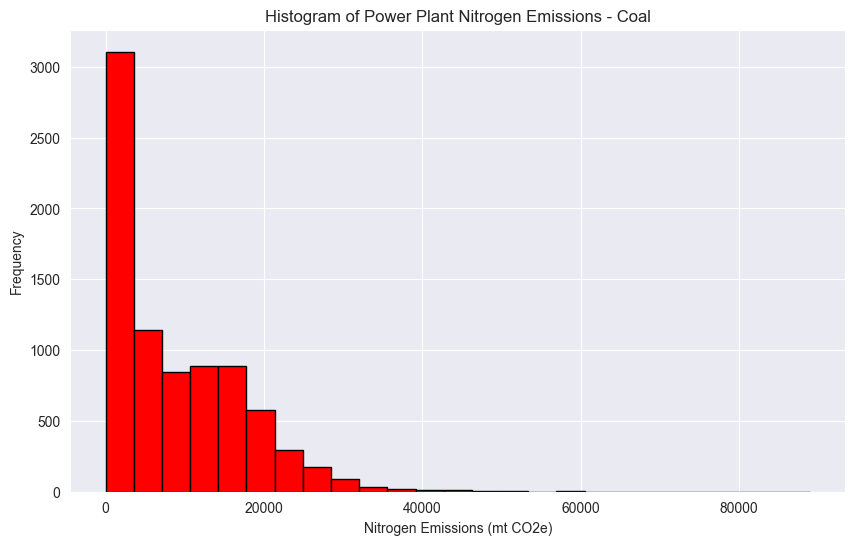

In [43]:
plt.figure(figsize=(10, 6))
df14 = data[(data['Industry Type (sectors)'] == 'Power Plants') & (data['General Fuel Type'] == 'Coal')]
plt.hist(df14['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'], bins=25, edgecolor='k', color='red')
plt.title('Histogram of Power Plant Nitrogen Emissions - Coal')
plt.xlabel('Nitrogen Emissions (mt CO2e)')
plt.ylabel('Frequency')
plt.show()

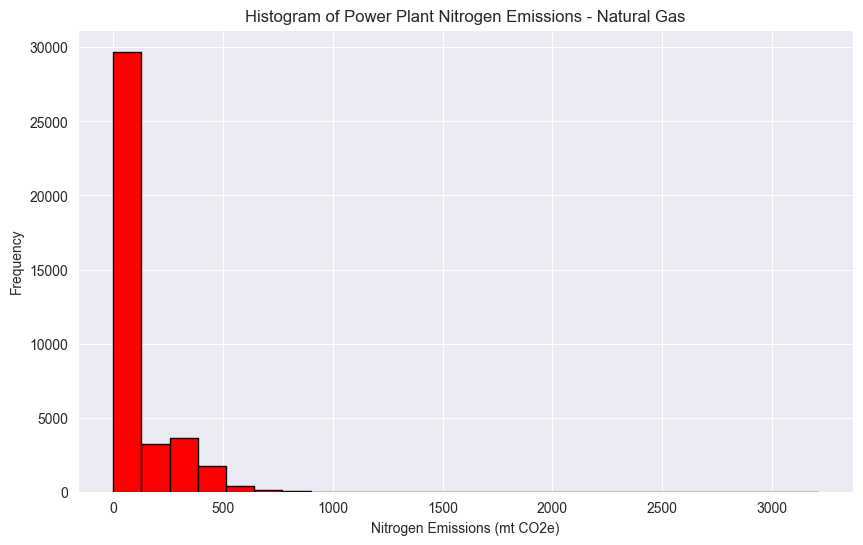

In [44]:
plt.figure(figsize=(10, 6))
df14 = data[(data['Industry Type (sectors)'] == 'Power Plants') & (data['General Fuel Type'] == 'Natural Gas')]
plt.hist(df14['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'], bins=25, edgecolor='k', color='red')
plt.title('Histogram of Power Plant Nitrogen Emissions - Natural Gas')
plt.xlabel('Nitrogen Emissions (mt CO2e)')
plt.ylabel('Frequency')
plt.show()

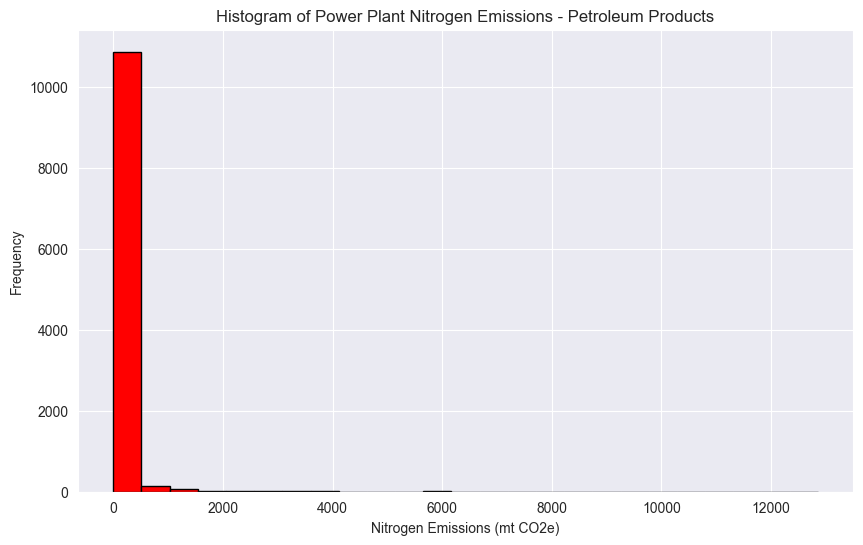

In [45]:
plt.figure(figsize=(10, 6))
df14 = data[(data['Industry Type (sectors)'] == 'Power Plants') & (data['General Fuel Type'] == 'Petroleum Products')]
plt.hist(df14['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'], bins=25, edgecolor='k', color='red')
plt.title('Histogram of Power Plant Nitrogen Emissions - Petroleum Products')
plt.xlabel('Nitrogen Emissions (mt CO2e)')
plt.ylabel('Frequency')
plt.show()

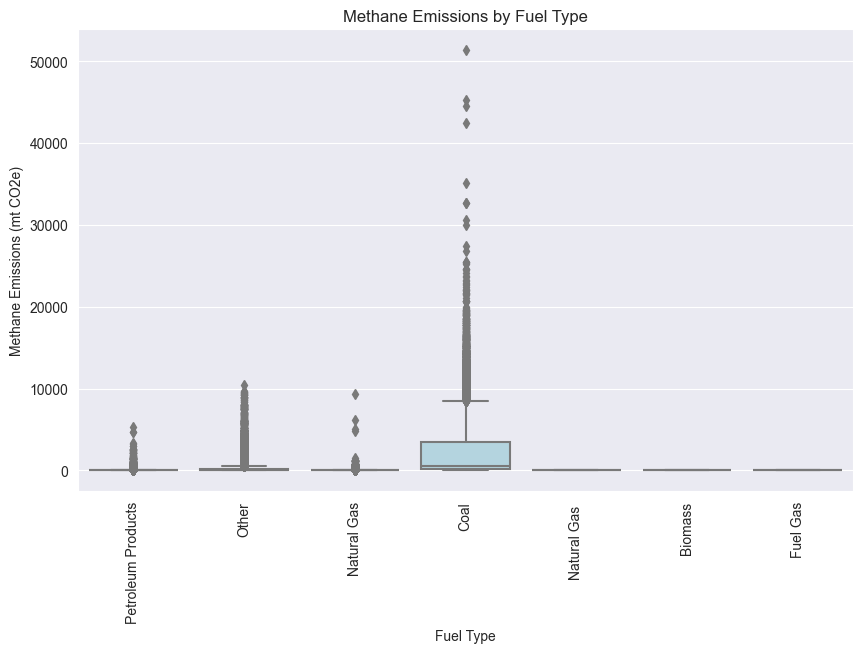

In [46]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='General Fuel Type', y='Fuel Methane (CH4) emissions (mt CO2e)', data=data, color='lightblue')
plt.title('Methane Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Methane Emissions (mt CO2e)')
plt.xticks(rotation=90)
plt.show()  

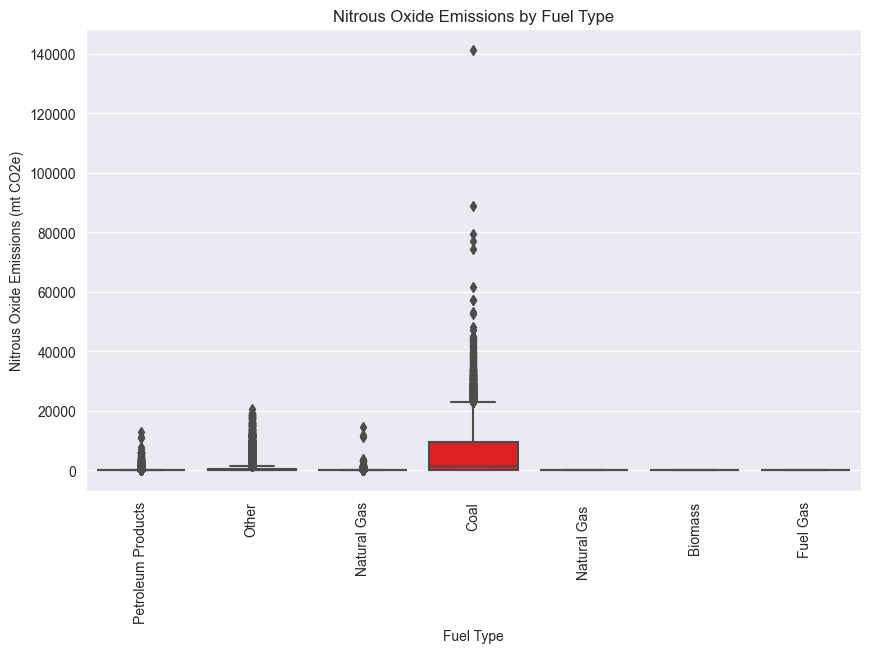

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='General Fuel Type', y='Fuel Nitrous Oxide (N2O) emissions (mt CO2e)', data=data, color='red')
plt.title('Nitrous Oxide Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Nitrous Oxide Emissions (mt CO2e)')
plt.xticks(rotation=90)
plt.show()  

In [48]:
df15 = original[(original['Industry Type (sectors)'] == 'Power Plants') & (original['General Fuel Type'] == 'Coal')]
CH4 = df15.groupby(['Facility Name', 'State'])['Fuel Methane (CH4) emissions (mt CO2e)'].mean().reset_index()
N2O = df15.groupby(['Facility Name', 'State'])['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'].mean().reset_index()
print(CH4.sort_values(by='Fuel Methane (CH4) emissions (mt CO2e)', ascending=False).head(5))
print('___________________________________________________________________________________')
print(N2O.sort_values(by='Fuel Nitrous Oxide (N2O) emissions (mt CO2e)', ascending=False).head(5))

                     Facility Name State  \
395                       Rockport    IN   
167                  Gen J M Gavin    OH   
365                       Powerton    IL   
315             Mountaineer (1301)    WV   
466  W H Zimmer Generating Station    OH   

     Fuel Methane (CH4) emissions (mt CO2e)  
395                            32913.863636  
167                            21171.295455  
365                            17815.545455  
315                            17208.750000  
466                            16790.250000  
___________________________________________________________________________________
          Facility Name State  Fuel Nitrous Oxide (N2O) emissions (mt CO2e)
395            Rockport    IN                                  57493.681818
167       Gen J M Gavin    OH                                  37001.440909
365            Powerton    IL                                  31113.367273
315  Mountaineer (1301)    WV                                  30139.72